In [1]:
import numpy as np

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# 加载了数据
mnist = input_data.read_data_sets('./',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# 创建变量占位符

X = tf.placeholder(dtype=tf.float64,shape = [None,784])

y = tf.placeholder(dtype=tf.float64,shape = [None,10])

In [4]:
# 卷积核，在卷积神经网络中，是变量
# 变量生成方法
def gen_v(shape):
    return tf.Variable(initial_value=tf.random_normal(dtype = tf.float64,shape = shape,stddev = 0.1),dtype=tf.float64)

In [5]:
# 定义方法，完成卷积操作
def conv(input_data,filter_):
    return tf.nn.conv2d(input=input_data,filter=filter_,strides=[1,1,1,1],padding='SAME')


# 定义，池化操作
def pool(input_data):
    return tf.nn.max_pool(value=input_data,ksize = [1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [8]:
X

<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float64>

In [9]:
img = mnist.train.images[0]
img.shape

(784,)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

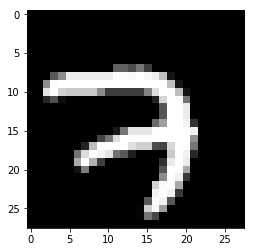

In [11]:
plt.imshow(img.reshape(28,28),cmap = plt.cm.gray)

In [6]:
# 第一层卷积
input_data1 = tf.reshape(X,shape = [-1,28,28,1])

# 卷积核
filter1 = gen_v(shape = [3,3,1,64])

# 偏差bias
b1 = gen_v(shape = [64])

conv1 = conv(input_data1,filter1) + b1

# 池化
pool1 = pool(conv1)

# 激活函数
active1 = tf.nn.relu(pool1)
active1

<tf.Tensor 'Relu:0' shape=(?, 14, 14, 64) dtype=float64>

In [ ]:
# 系数 640 个

In [7]:
# 第二层卷积
# 使用的是第一层卷积的数据

filter2 = gen_v(shape = [3,3,64,64])
b2 = gen_v(shape = [64])

conv2 = conv(active1,filter2) + b2


# 池化
pool2 = pool(conv2)

# 激活
active2 = tf.nn.sigmoid(pool2)
active2

<tf.Tensor 'Sigmoid:0' shape=(?, 7, 7, 64) dtype=float64>

In [ ]:
# 第二层卷积 36928系数 float64

In [8]:
# 全连接层,矩阵运算
# 1024个连接，1024方程，1024神经元
fc_w = gen_v(shape = [7*7*64,1024])

fc_b = gen_v(shape = [1024])

conn = tf.matmul(tf.reshape(active2,shape = [-1,7*7*64]),fc_w) + fc_b
conn
# ? ? ? shape = [?,1024]

<tf.Tensor 'add_2:0' shape=(?, 1024) dtype=float64>

In [ ]:
# 全连接层3212288 系数

In [9]:
# dropout 防止过拟合
kp = tf.placeholder(dtype=tf.float64,shape = None)
dropout = tf.nn.dropout(conn,keep_prob=kp)
dropout

<tf.Tensor 'dropout/mul:0' shape=(?, 1024) dtype=float64>

In [10]:
# 输出层out
# 10个类别 0 ~ 9
out_w = gen_v(shape = [1024,10])
out_b = gen_v(shape = [10])

out = tf.matmul(dropout,out_w) + out_b
out
# ? ? ? shape = [?,10]

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float64>

In [11]:
# 概率，预测的概率，非真实分布
prob = tf.nn.softmax(out)
prob

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float64>

In [12]:
# 真实概率是y
y

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float64>

In [12]:
# 交叉熵
cost = tf.reduce_mean(tf.reduce_sum(y*tf.log(1/prob),axis = -1))
cost

<tf.Tensor 'Mean:0' shape=() dtype=float64>

In [29]:
cost2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=prob))
cost2

<tf.Tensor 'Mean_1:0' shape=() dtype=float64>

In [13]:
adam = tf.train.AdamOptimizer()


In [14]:
optimizer = adam.minimize(cost)
optimizer

<tf.Operation 'Adam' type=NoOp>

In [33]:
config = tf.ConfigProto()

In [38]:
x=3
y=4
z=2
with tf.device('/cpu:0'):
    a=tf.multiply(x,x)
    b=tf.multiply(a,y)
with tf.device('/gpu:1'):
    c=tf.add(y,z)
# 新建 session with log_device_placement 并设置为 True.
sess=tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))
# 运行这个 op.
d=tf.add(b,c)
print(sess.run(d))

sess.close()

42


In [ ]:
tf.

In [45]:

with tf.device('/cpu:0'):
    a=tf.multiply(x,x)
    b=tf.multiply(a,y)
    
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))

print(sess.run(fetches = a))
sess.close()

9


In [44]:
a=tf.multiply(x,x)
b=tf.multiply(a,y)
    
sess = tf.Session()

print(sess.run(fetches = a))
sess.close()

InvalidArgumentError: Cannot assign a device for operation 'Add_6': Operation was explicitly assigned to /device:GPU:1 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0 ]. Make sure the device specification refers to a valid device.
	 [[{{node Add_6}} = Add[T=DT_INT32, _device="/device:GPU:1"](Add_6/x, Add_6/y)]]

Caused by op 'Add_6', defined at:
  File "d:\python3.6.8\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "d:\python3.6.8\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "d:\python3.6.8\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "d:\python3.6.8\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "d:\python3.6.8\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "d:\python3.6.8\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "d:\python3.6.8\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "d:\python3.6.8\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "d:\python3.6.8\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "d:\python3.6.8\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "d:\python3.6.8\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "d:\python3.6.8\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "d:\python3.6.8\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "d:\python3.6.8\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "d:\python3.6.8\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "d:\python3.6.8\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "d:\python3.6.8\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "d:\python3.6.8\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "d:\python3.6.8\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "d:\python3.6.8\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "d:\python3.6.8\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "d:\python3.6.8\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "d:\python3.6.8\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "d:\python3.6.8\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "d:\python3.6.8\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "d:\python3.6.8\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "d:\python3.6.8\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-db0e6fe8f7f8>", line 8, in <module>
    c=tf.add(y,z)
  File "d:\python3.6.8\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 311, in add
    "Add", x=x, y=y, name=name)
  File "d:\python3.6.8\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "d:\python3.6.8\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "d:\python3.6.8\lib\site-packages\tensorflow\python\framework\ops.py", line 3272, in create_op
    op_def=op_def)
  File "d:\python3.6.8\lib\site-packages\tensorflow\python\framework\ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'Add_6': Operation was explicitly assigned to /device:GPU:1 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0 ]. Make sure the device specification refers to a valid device.
	 [[{{node Add_6}} = Add[T=DT_INT32, _device="/device:GPU:1"](Add_6/x, Add_6/y)]]


In [16]:
saver = tf.train.Saver()

In [17]:
# gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.6)

with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:
    
    sess.run(tf.global_variables_initializer())
    
    
    for i in range(10):
        c = 0
        for j in range(100):
            X_train,y_train = mnist.train.next_batch(550)
            
            optimizer_,cost_ = sess.run(fetches = [optimizer,cost],feed_dict= {X:X_train,y:y_train,kp:0.5})
            
            c += cost_/100
            print('里层循环次数：%d，每次损失：%0.4f'%(j,cost_))
            
        print('--------------执行次数：%d损失函数是：%0.4f----------------'%(i,c))
        saver.save(sess,save_path='./cnn/model',global_step=i)

里层循环次数：0，每次损失：21.9375
里层循环次数：1，每次损失：31.1852
里层循环次数：2，每次损失：42.0242
里层循环次数：3，每次损失：52.2043
里层循环次数：4，每次损失：52.9595
里层循环次数：5，每次损失：43.9142
里层循环次数：6，每次损失：43.6127
里层循环次数：7，每次损失：41.5568
里层循环次数：8，每次损失：32.9314
里层循环次数：9，每次损失：24.9909
里层循环次数：10，每次损失：30.8748
里层循环次数：11，每次损失：18.9923
里层循环次数：12，每次损失：14.7657
里层循环次数：13，每次损失：13.4464
里层循环次数：14，每次损失：16.3367
里层循环次数：15，每次损失：23.0148
里层循环次数：16，每次损失：12.5554
里层循环次数：17，每次损失：12.1780
里层循环次数：18，每次损失：10.5183
里层循环次数：19，每次损失：9.3242
里层循环次数：20，每次损失：13.4942
里层循环次数：21，每次损失：14.0757
里层循环次数：22，每次损失：10.4146
里层循环次数：23，每次损失：12.6207
里层循环次数：24，每次损失：11.9985
里层循环次数：25，每次损失：11.0435
里层循环次数：26，每次损失：10.9045
里层循环次数：27，每次损失：6.5509
里层循环次数：28，每次损失：6.1003
里层循环次数：29，每次损失：6.6036
里层循环次数：30，每次损失：9.7497
里层循环次数：31，每次损失：9.3378
里层循环次数：32，每次损失：8.2711
里层循环次数：33，每次损失：8.4911
里层循环次数：34，每次损失：7.3941
里层循环次数：35，每次损失：9.8130
里层循环次数：36，每次损失：9.8698
里层循环次数：37，每次损失：4.9310
里层循环次数：38，每次损失：4.6481
里层循环次数：39，每次损失：8.1825
里层循环次数：40，每次损失：7.8034
里层循环次数：41，每次损失：7.8838
里层循环次数：42，每次损失：7.5667
里层循环次数：43，每次损失：4.7141
里层循环次数：44，每次损失：5

里层循环次数：67，每次损失：0.2585
里层循环次数：68，每次损失：0.1906
里层循环次数：69，每次损失：0.2480
里层循环次数：70，每次损失：0.1773
里层循环次数：71，每次损失：0.2526
里层循环次数：72，每次损失：0.2164
里层循环次数：73，每次损失：0.1835
里层循环次数：74，每次损失：0.1570
里层循环次数：75，每次损失：0.2199
里层循环次数：76，每次损失：0.2234
里层循环次数：77，每次损失：0.2303
里层循环次数：78，每次损失：0.1518
里层循环次数：79，每次损失：0.1900
里层循环次数：80，每次损失：0.1528
里层循环次数：81，每次损失：0.1946
里层循环次数：82，每次损失：0.2602
里层循环次数：83，每次损失：0.2513
里层循环次数：84，每次损失：0.2168
里层循环次数：85，每次损失：0.1704
里层循环次数：86，每次损失：0.2326
里层循环次数：87，每次损失：0.1877
里层循环次数：88，每次损失：0.2369
里层循环次数：89，每次损失：0.2354
里层循环次数：90，每次损失：0.1798
里层循环次数：91，每次损失：0.2292
里层循环次数：92，每次损失：0.2297
里层循环次数：93，每次损失：0.2417
里层循环次数：94，每次损失：0.2326
里层循环次数：95，每次损失：0.2097
里层循环次数：96，每次损失：0.2457
里层循环次数：97，每次损失：0.2190
里层循环次数：98，每次损失：0.2177
里层循环次数：99，每次损失：0.1685
--------------执行次数：3损失函数是：0.2442----------------
里层循环次数：0，每次损失：0.2326
里层循环次数：1，每次损失：0.2789
里层循环次数：2，每次损失：0.2750
里层循环次数：3，每次损失：0.2337
里层循环次数：4，每次损失：0.2110
里层循环次数：5，每次损失：0.2202
里层循环次数：6，每次损失：0.2720
里层循环次数：7，每次损失：0.2744
里层循环次数：8，每次损失：0.2182
里层循环次数：9，每次损失：0.2038
里层循环次数：10，每次损失：

里层循环次数：33，每次损失：0.1751
里层循环次数：34，每次损失：0.1322
里层循环次数：35，每次损失：0.1349
里层循环次数：36，每次损失：0.1291
里层循环次数：37，每次损失：0.1939
里层循环次数：38，每次损失：0.2256
里层循环次数：39，每次损失：0.1319
里层循环次数：40，每次损失：0.1273
里层循环次数：41，每次损失：0.1120
里层循环次数：42，每次损失：0.2016
里层循环次数：43，每次损失：0.1393
里层循环次数：44，每次损失：0.1425
里层循环次数：45，每次损失：0.1262
里层循环次数：46，每次损失：0.1164
里层循环次数：47，每次损失：0.1532
里层循环次数：48，每次损失：0.0947
里层循环次数：49，每次损失：0.1372
里层循环次数：50，每次损失：0.1596
里层循环次数：51，每次损失：0.1680
里层循环次数：52，每次损失：0.1488
里层循环次数：53，每次损失：0.1367
里层循环次数：54，每次损失：0.1197
里层循环次数：55，每次损失：0.0916
里层循环次数：56，每次损失：0.1036
里层循环次数：57，每次损失：0.1234
里层循环次数：58，每次损失：0.0713
里层循环次数：59，每次损失：0.1097
里层循环次数：60，每次损失：0.1290
里层循环次数：61，每次损失：0.1075
里层循环次数：62，每次损失：0.1605
里层循环次数：63，每次损失：0.0966
里层循环次数：64，每次损失：0.1337
里层循环次数：65，每次损失：0.1562
里层循环次数：66，每次损失：0.1606
里层循环次数：67，每次损失：0.1227
里层循环次数：68，每次损失：0.1059
里层循环次数：69，每次损失：0.1315
里层循环次数：70，每次损失：0.1496
里层循环次数：71，每次损失：0.1341
里层循环次数：72，每次损失：0.1452
里层循环次数：73，每次损失：0.1358
里层循环次数：74，每次损失：0.0881
里层循环次数：75，每次损失：0.0998
里层循环次数：76，每次损失：0.1350
里层循环次数：77，每次损失：0.1445
里层循环次数：78，

In [1]:
with tf.Session() as sess:
    saver.restore(sess,'./cnn/model-8')
    
    X_test,y_test = mnist.test.next_batch(2000)
    
    
    prob_ = sess.run(prob,feed_dict = {X:X_test,kp:1.0})
    
    
    y_test = y_test.argmax(axis = -1)
    
    prob_ = prob_.argmax(axis = -1)
    
    print((y_test == prob_).mean())

NameError: name 'tf' is not defined